In [131]:
import xarray as xr
import numpy as np
import pandas as pd
import properscoring as ps
import matplotlib.pyplot as plt
import datetime
import os

In [132]:
import importlib

In [133]:
%matplotlib inline

In [134]:
import seaborn as sns
cpal = sns.color_palette()

In [135]:
import letkf_forecasting.letkf_io as letkf_io
import letkf_forecasting.tmh_plot as tmt_plot
import letkf_forecasting.analyse_results as analyse_results
import letkf_forecasting.prepare_sat_data as prepare_sat_data

In [136]:
import numba

In [137]:
import sklearn.calibration as calibration

In [138]:
%matplotlib inline

# For CRPS

In [23]:
importlib.reload(analyse_results)
# month_day = [[4, 9], [4, 15], [4, 18], [5, 6], [5, 9], [5, 29], [6, 11], [6, 12]]
# month_day = [[4, 9],  [4, 15], [4, 18],
#              [5, 6],  [5, 9],  [5, 29],
#              [6, 11], [6, 12],
#              [4, 2],  [4, 5],  [4, 19],
#              [5, 7],  [5, 8],  [5, 19],
#              [6, 3],  [6, 10], [6, 14],
#              [6, 15]]
month_day = [[4, 9],  [4, 15], [4, 18],
             [5, 6],  [5, 9],  [5, 29],
             [6, 11], [6, 12],
             [4, 2],  [4, 5],  [4, 19],
             [5, 7],  [5, 8],  [5, 19],
             [6, 3],  [6, 10], [6, 14],
             [6, 15],
             [4, 10], [4, 11], [4, 12],
             [4, 20], [4, 21], [4, 22],
             [4, 25], [4, 26], [5, 5],
             [5, 20], [5, 21], [5, 22],
             [5, 23], [5, 24], [5, 25],
             [5, 30], [6, 16], [6, 17],
             [6, 18], [6, 19], [6, 22]]
runs = ['owp_opt', 'ow_15',
        'climatology', 'dates_climatology',
        'persistence', 'persistent_dist']
stats = ['crps']
returned = analyse_results.read_prob_stats(
    month_day, runs, stats)

owp_opt
crps
ow_15
crps
climatology
crps
dates_climatology
crps
persistence
crps
persistent_dist
crps


In [24]:
for a_returned in returned:
    this_name = a_returned['name']
    exec(this_name + ' = a_returned')

In [ ]:
legend_dict = {'opt_flow': 'Dense opt. flow',
               'persistence': 'Persistence',
               'radiosonde': 'Radiosonde',
               'wrf': 'WRF',
               'wrf_no_div': 'WRF no div.',
               'ow_15': 'WRF & opt. flow',
               'owp_opt': 'WRF, opt. flow, & wind pert.'}

In [34]:
owp_opt['crps'].mean().index[0]

15

Text(0,0.5,'CRPS')

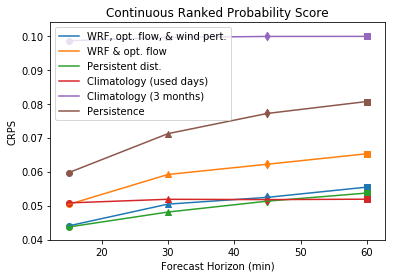

In [45]:
marks = ['o', '^', 'd', 's']
plt.figure()
plt.plot(owp_opt['crps'].mean(), color=cpal[0])
plt.plot(ow_15['crps'].mean(), color=cpal[1])
plt.plot(persistent_dist['crps'].mean(), color=cpal[2])
plt.plot(dates_climatology['crps'].mean(), color=cpal[3])
plt.plot(climatology['crps'].mean(), color=cpal[4])
plt.plot(persistence['crps'].mean(), color=cpal[5])
plt.legend(['WRF, opt. flow, & wind pert.',
            'WRF & opt. flow',
            'Persistent dist.',
            'Climatology (used days)',
            'Climatology (3 months)',
            'Persistence'])
for count, m in enumerate(marks):
    plt.scatter(owp_opt['crps'].mean().index[count],
                owp_opt['crps'].mean().iloc[count],
                color=cpal[0], marker=m)
    
    plt.scatter(ow_15['crps'].mean().index[count], 
                ow_15['crps'].mean().iloc[count],
                color=cpal[1], marker=m)
               
    plt.scatter(persistent_dist['crps'].mean().index[count],
                persistent_dist['crps'].mean().iloc[count],
                color=cpal[2], marker=m)
    
    plt.scatter(dates_climatology['crps'].mean().index[count],
                dates_climatology['crps'].mean().iloc[count],
                color=cpal[3], marker=m)
    
    plt.scatter(climatology['crps'].mean().index[count],
                climatology['crps'].mean().iloc[count],
                color=cpal[4], marker=m)
    
    plt.scatter(persistence['crps'].mean().index[count],
                persistence['crps'].mean().iloc[count],
                color=cpal[5], marker=m)
    
plt.title('Continuous Ranked Probability Score')
plt.xlabel('Forecast Horizon (min)')
plt.ylabel('CRPS')

Text(0,0.5,'CRPS')

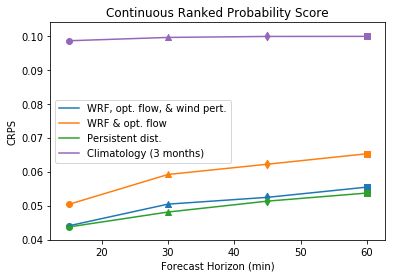

In [50]:
marks = ['o', '^', 'd', 's']
plt.figure()
plt.plot(owp_opt['crps'].mean(), color=cpal[0])
plt.plot(ow_15['crps'].mean(), color=cpal[1])
plt.plot(persistent_dist['crps'].mean(), color=cpal[2])
# plt.plot(dates_climatology['crps'].mean(), color=cpal[3])
plt.plot(climatology['crps'].mean(), color=cpal[4])
# plt.plot(persistence['crps'].mean(), color=cpal[5])
# plt.legend(['WRF, opt. flow, & wind pert.',
#             'WRF & opt. flow',
#             'Persistent dist.',
#             'Climatology (used days)',
#             'Climatology (3 months)',
#             'Persistence'])
plt.legend(['WRF, opt. flow, & wind pert.',
            'WRF & opt. flow',
            'Persistent dist.',
            'Climatology (3 months)'])
for count, m in enumerate(marks):
    plt.scatter(owp_opt['crps'].mean().index[count],
                owp_opt['crps'].mean().iloc[count],
                color=cpal[0], marker=m)
    
    plt.scatter(ow_15['crps'].mean().index[count], 
                ow_15['crps'].mean().iloc[count],
                color=cpal[1], marker=m)
               
    plt.scatter(persistent_dist['crps'].mean().index[count],
                persistent_dist['crps'].mean().iloc[count],
                color=cpal[2], marker=m)
    
#     plt.scatter(dates_climatology['crps'].mean().index[count],
#                 dates_climatology['crps'].mean().iloc[count],
#                 color=cpal[3], marker=m)
    
    plt.scatter(climatology['crps'].mean().index[count],
                climatology['crps'].mean().iloc[count],
                color=cpal[4], marker=m)
    
#     plt.scatter(persistence['crps'].mean().index[count],
#                 persistence['crps'].mean().iloc[count],
#                 color=cpal[5], marker=m)
    
plt.title('Continuous Ranked Probability Score')
plt.xlabel('Forecast Horizon (min)')
plt.ylabel('CRPS')

Text(0,0.5,'CRPS')

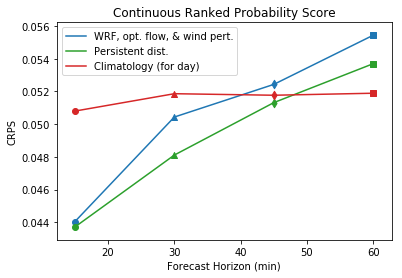

In [53]:
marks = ['o', '^', 'd', 's']
plt.figure()
plt.plot(owp_opt['crps'].mean(), color=cpal[0])
# plt.plot(ow_15['crps'].mean(), color=cpal[1])
plt.plot(persistent_dist['crps'].mean(), color=cpal[2])
plt.plot(dates_climatology['crps'].mean(), color=cpal[3])
# plt.plot(climatology['crps'].mean(), color=cpal[4])
# plt.plot(persistence['crps'].mean(), color=cpal[5])
# plt.legend(['WRF, opt. flow, & wind pert.',
#             'WRF & opt. flow',
#             'Persistent dist.',
#             'Climatology (used days)',
#             'Climatology (3 months)',
#             'Persistence'])
plt.legend(['WRF, opt. flow, & wind pert.',
            'Persistent dist.',
            'Climatology (for day)'])
for count, m in enumerate(marks):
    plt.scatter(owp_opt['crps'].mean().index[count],
                owp_opt['crps'].mean().iloc[count],
                color=cpal[0], marker=m)
    
#     plt.scatter(ow_15['crps'].mean().index[count], 
#                 ow_15['crps'].mean().iloc[count],
#                 color=cpal[1], marker=m)
               
    plt.scatter(persistent_dist['crps'].mean().index[count],
                persistent_dist['crps'].mean().iloc[count],
                color=cpal[2], marker=m)
    
    plt.scatter(dates_climatology['crps'].mean().index[count],
                dates_climatology['crps'].mean().iloc[count],
                color=cpal[3], marker=m)
    
#     plt.scatter(climatology['crps'].mean().index[count],
#                 climatology['crps'].mean().iloc[count],
#                 color=cpal[4], marker=m)
    
#     plt.scatter(persistence['crps'].mean().index[count],
#                 persistence['crps'].mean().iloc[count],
#                 color=cpal[5], marker=m)
    
plt.title('Continuous Ranked Probability Score')
plt.xlabel('Forecast Horizon (min)')
plt.ylabel('CRPS')

# For Reliability

In [164]:
importlib.reload(analyse_results)
# month_day = [[4, 9], [4, 15], [4, 18], [5, 6], [5, 9], [5, 29], [6, 11], [6, 12]]
# month_day = [[4, 9],  [4, 15], [4, 18],
#              [5, 6],  [5, 9],  [5, 29],
#              [6, 11], [6, 12],
#              [4, 2],  [4, 5],  [4, 19],
#              [5, 7],  [5, 8],  [5, 19],
#              [6, 3],  [6, 10], [6, 14],
#              [6, 15]]
month_day = [[4, 9],  [4, 15], [4, 18],
             [5, 6],  [5, 9],  [5, 29],
             [6, 11], [6, 12],
             [4, 2],  [4, 5],  [4, 19],
             [5, 7],  [5, 8],  [5, 19],
             [6, 3],  [6, 10], [6, 14],
             [6, 15],
             [4, 10], [4, 11], [4, 12],
             [4, 20], [4, 21], [4, 22],
             [4, 25], [4, 26], [5, 5],
             [5, 20], [5, 21], [5, 22],
             [5, 23], [5, 24], [5, 25],
             [5, 30], [6, 16], [6, 17],
             [6, 18], [6, 19], [6, 22]]
runs = ['owp_opt', 'ow_15']
stats = ['brier_score',
         'forecast_hist',
         'fraction_of_positives',
         'mean_predicted_prob',
         'truth_hist']
stat_directory = ['clear_0_0p1']
these_stats = []
for this_stat in stats:
    for adir in stat_directory:
        these_stats.append(os.path.join(adir, this_stat))
returned = analyse_results.read_prob_stats(
    month_day, runs, these_stats)

owp_opt
clear_0_0p1/brier_score
clear_0_0p1/forecast_hist
clear_0_0p1/fraction_of_positives
clear_0_0p1/mean_predicted_prob
clear_0_0p1/truth_hist
ow_15
clear_0_0p1/brier_score
clear_0_0p1/forecast_hist
clear_0_0p1/fraction_of_positives
clear_0_0p1/mean_predicted_prob
clear_0_0p1/truth_hist


In [165]:
for a_returned in returned:
    this_name = a_returned['name']
    exec(this_name + ' = a_returned')

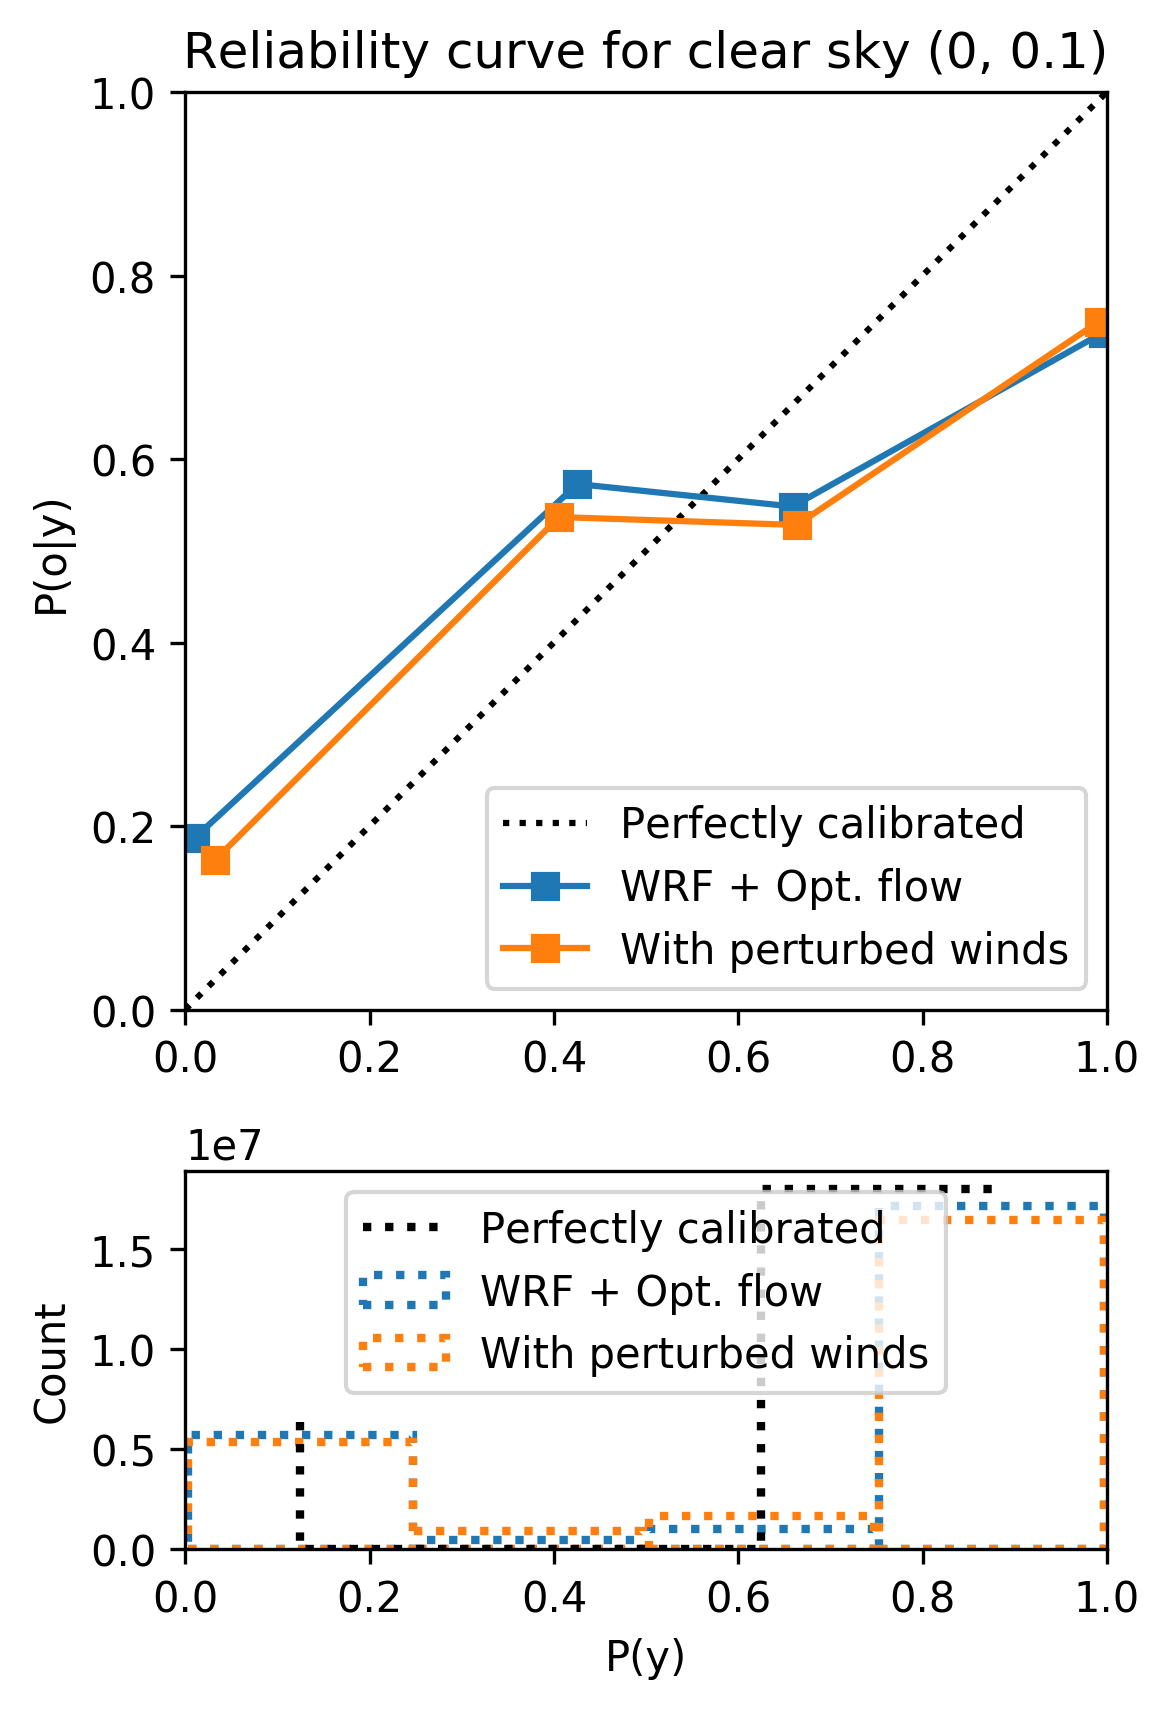

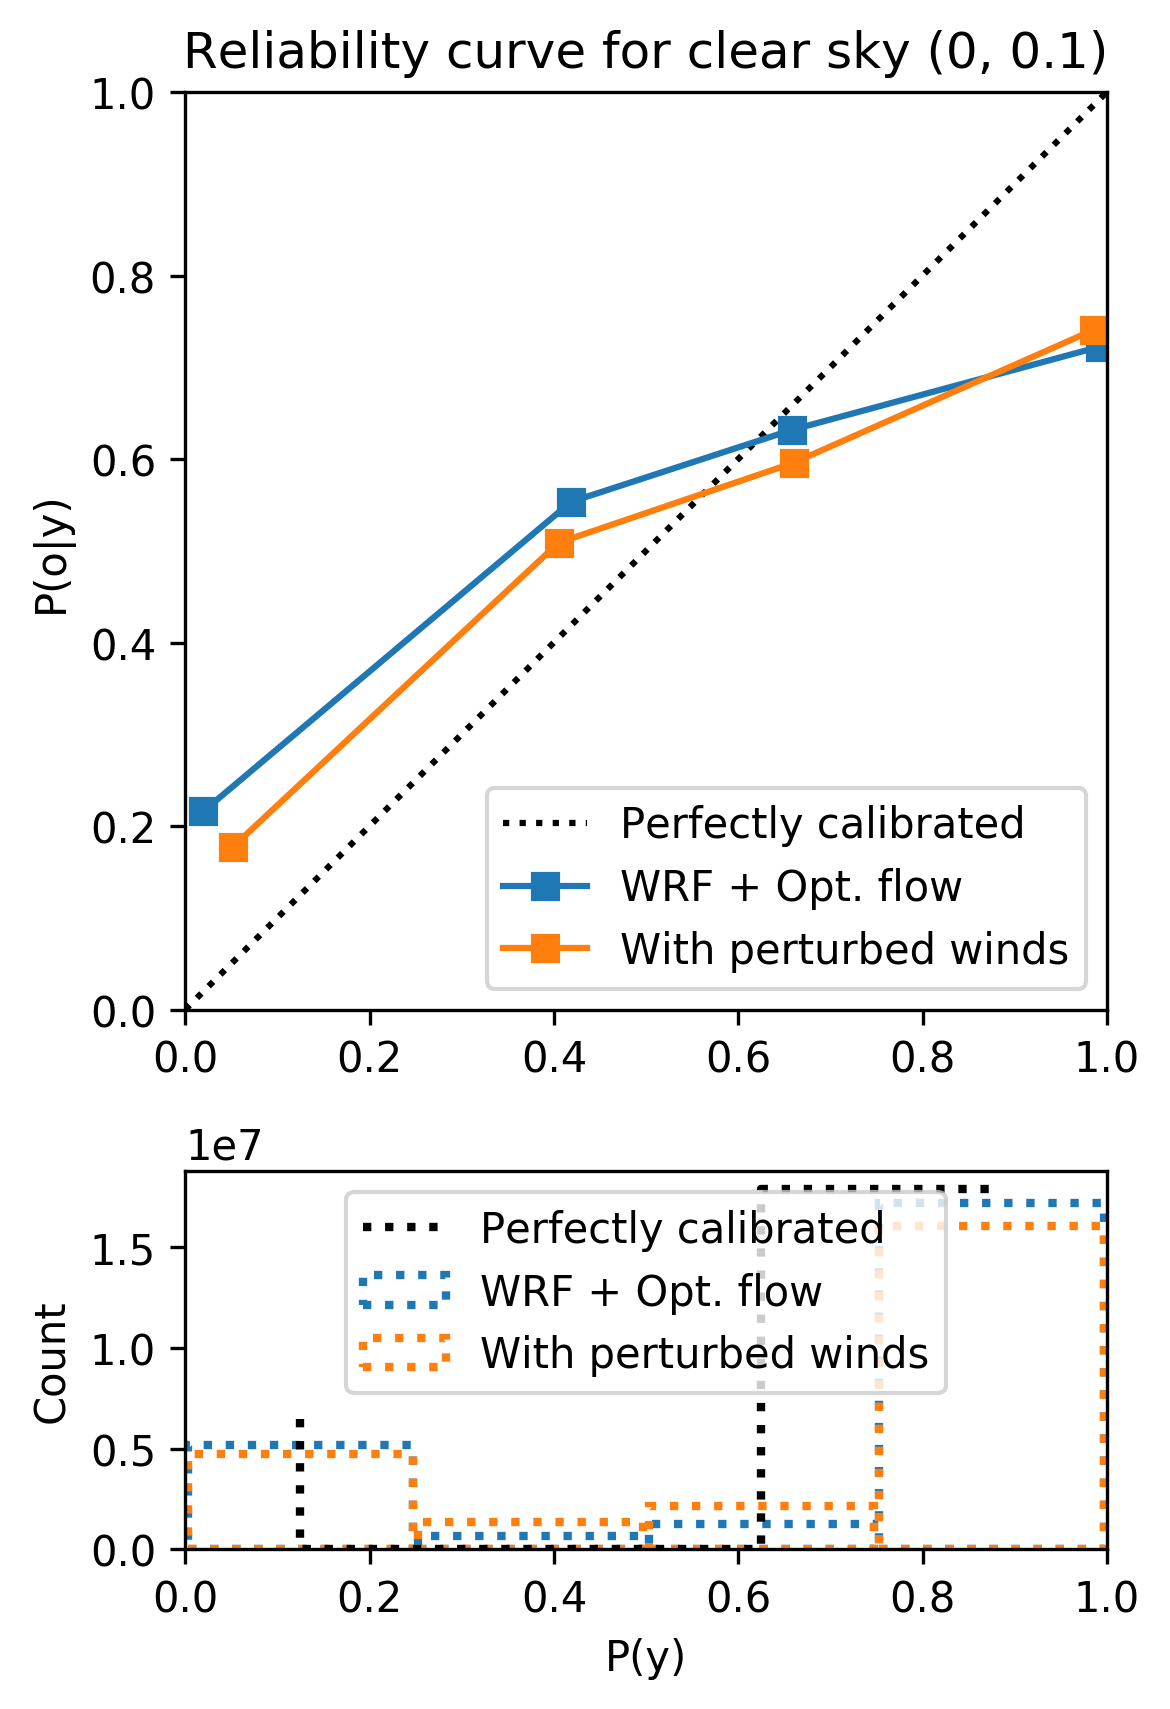

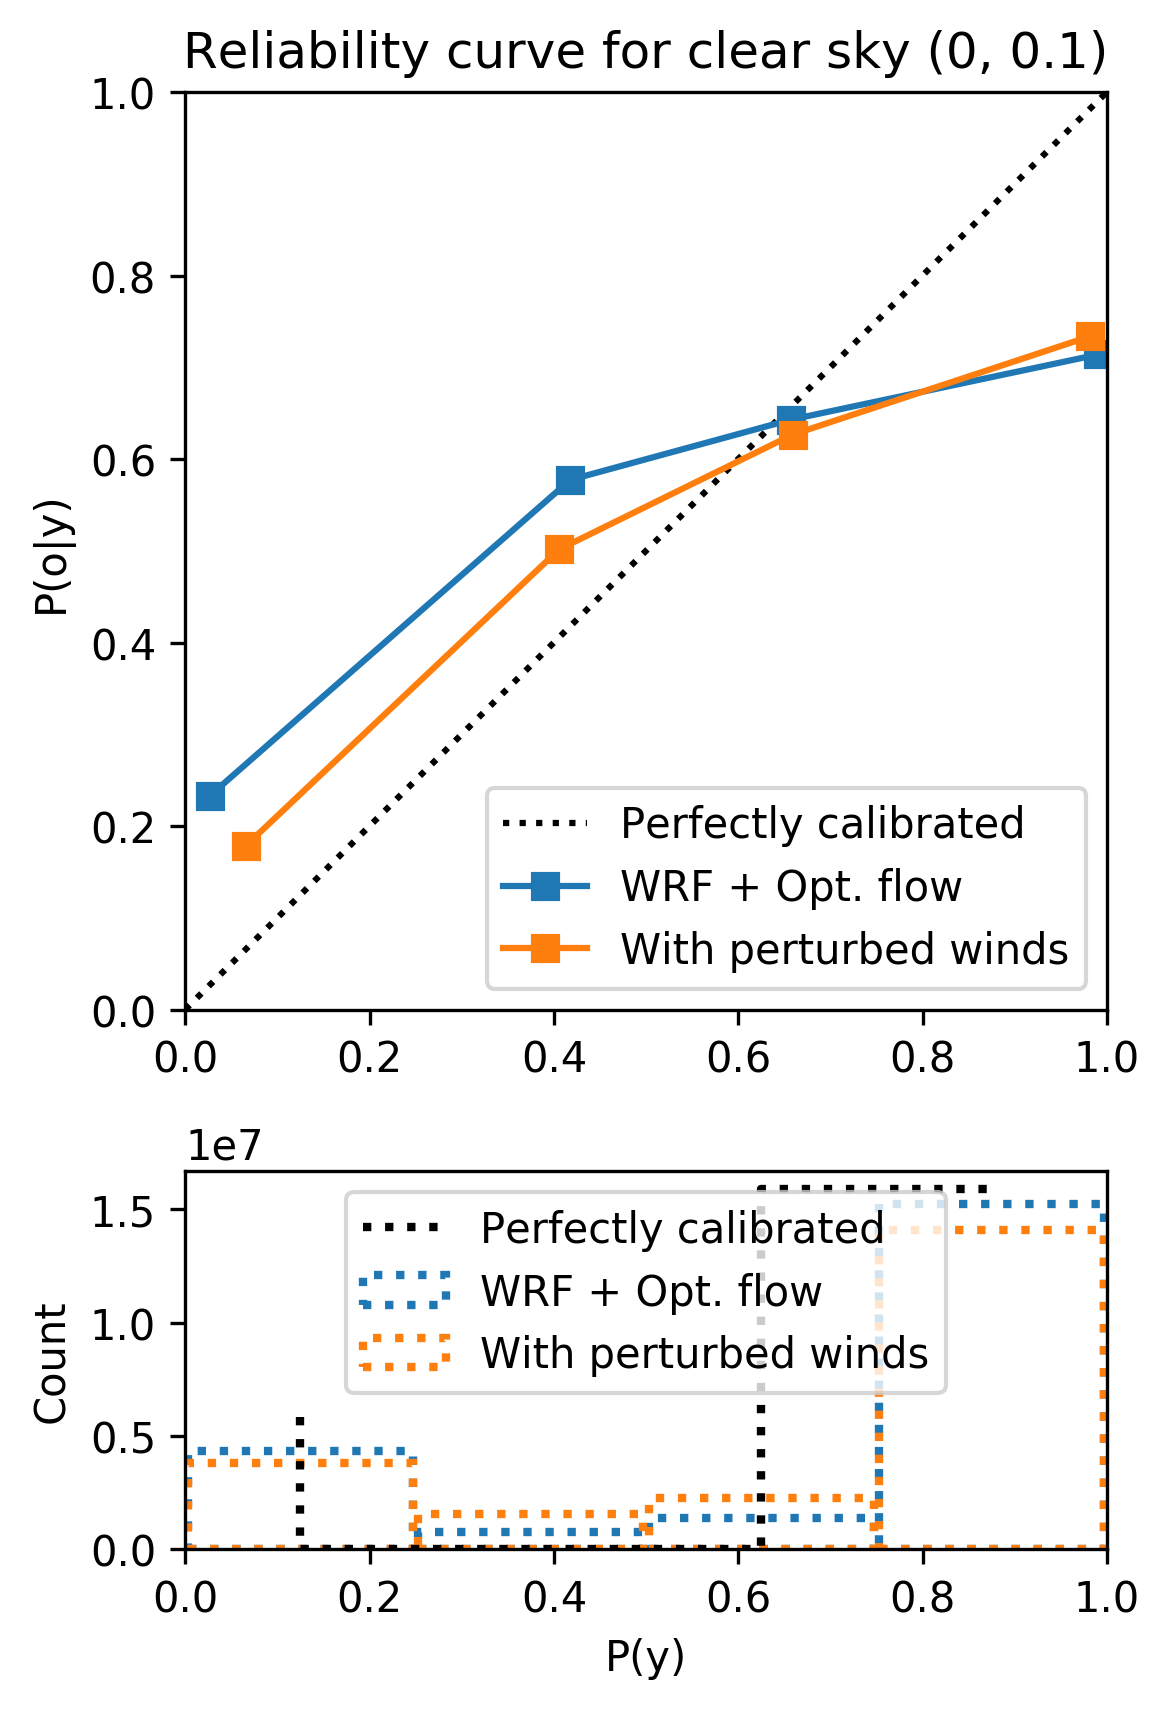

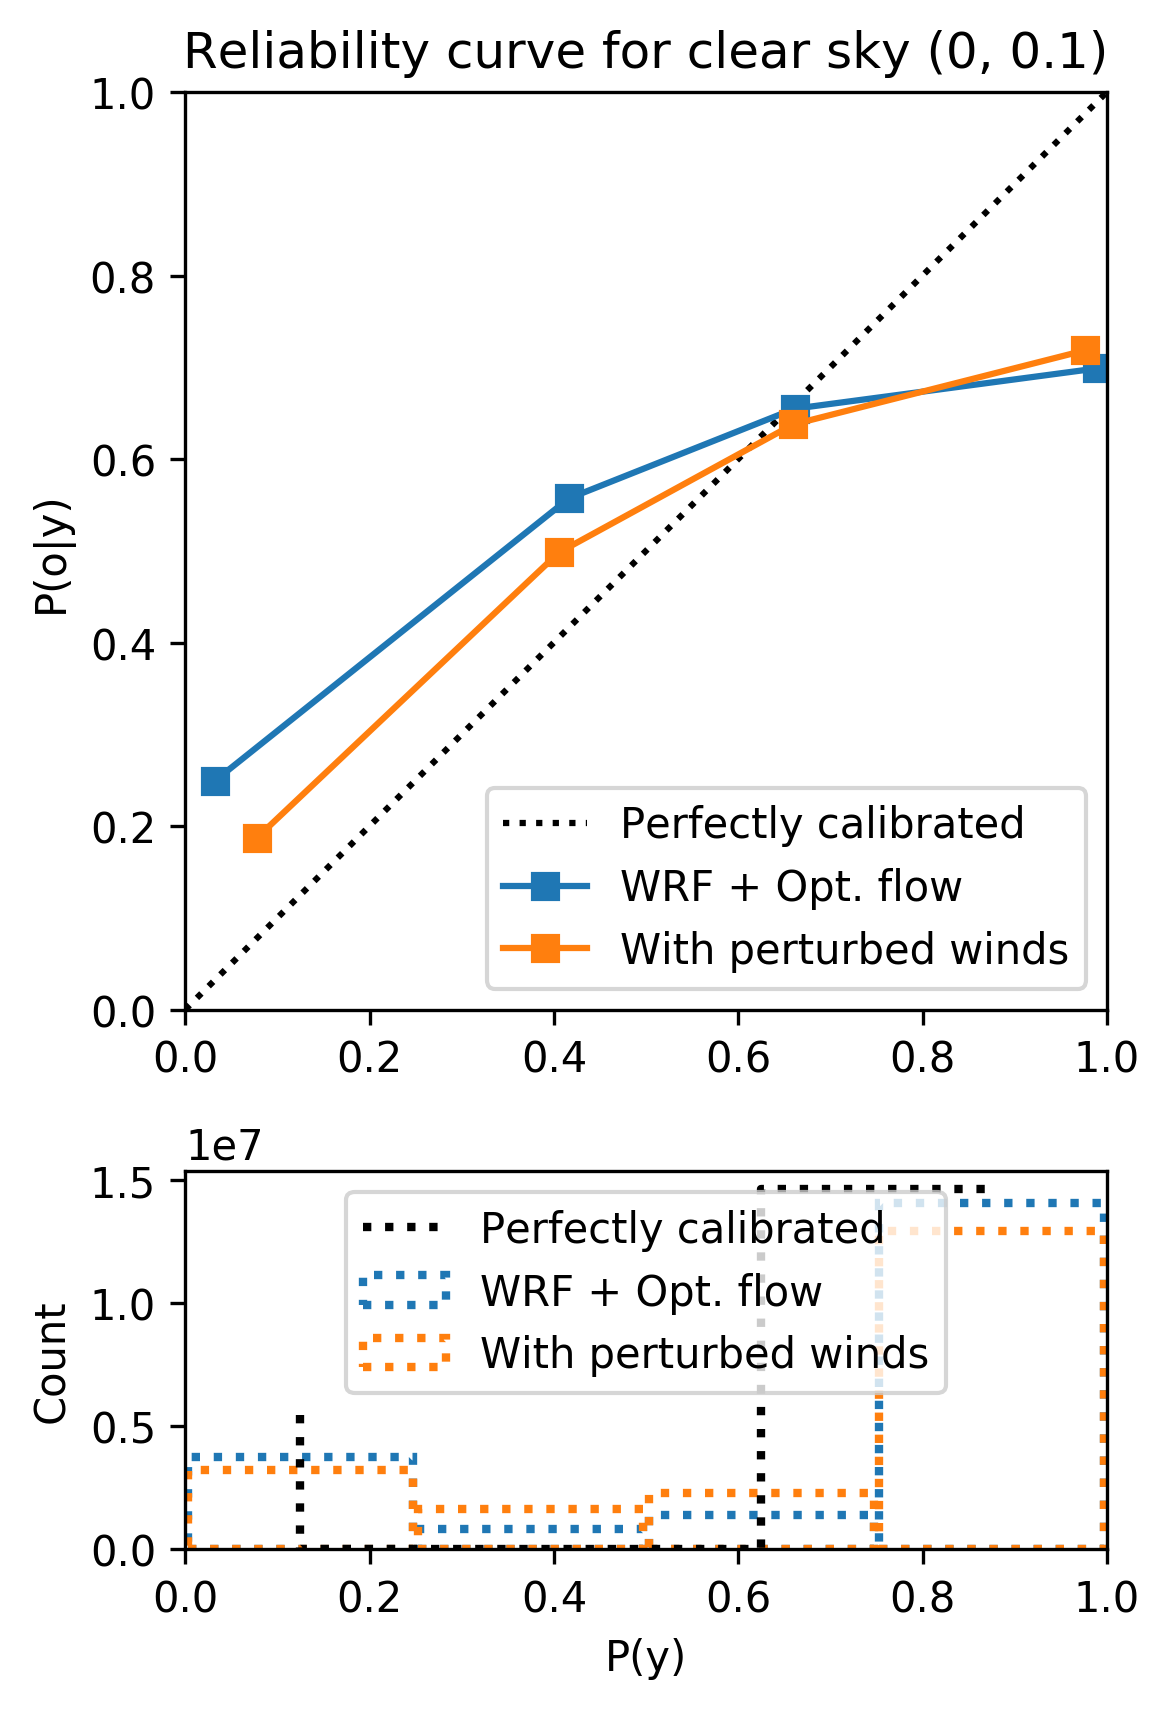

In [169]:
dpi = 300
for hor in [15, 30, 45, 60]:
    owp_mmp = owp_opt['clear_0_0p1/mean_predicted_prob'][hor].dropna()
    owp_fop = owp_opt['clear_0_0p1/fraction_of_positives'][hor].dropna()
    owp_th = owp_opt['clear_0_0p1/truth_hist'].loc[owp_mmp.index]
    owp_fh = owp_opt['clear_0_0p1/forecast_hist'][hor].dropna()
    
    owp_mmp = (owp_mmp * owp_fh).sum()/owp_fh.sum()
    owp_fop = (owp_fop * owp_fh).sum()/owp_fh.sum()
    owp_th = owp_th.sum()
    owp_fh = owp_fh.sum()
    
    ow15_mmp = ow_15['clear_0_0p1/mean_predicted_prob'][hor].dropna()
    ow15_fop = ow_15['clear_0_0p1/fraction_of_positives'][hor].dropna()
    ow15_th = ow_15['clear_0_0p1/truth_hist'].loc[ow15_mmp.index]
    ow15_fh = ow_15['clear_0_0p1/forecast_hist'][hor].dropna()
    
    ow15_mmp = (ow15_mmp * ow15_fh).sum()/ow15_fh.sum()
    ow15_fop = (ow15_fop * ow15_fh).sum()/ow15_fh.sum()
    ow15_th = ow15_th.sum()
    ow15_fh = ow15_fh.sum()
    
    num_of_bins = owp_fh.size
    figsize = plt.figaspect(1.38)
    figsize = plt.figaspect(1.45)
    
    fig = plt.figure(figsize=figsize, dpi=dpi)
    ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
    ax2 = plt.subplot2grid((3, 1), (2, 0))

    ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
#     ax2.hist(truth_thick.values.ravel(), color='k', linestyle=':', range=(0, 1),
#              bins=num_of_bins, label="Perfectly calibrated",
#              histtype="step", lw=2)
    xhist = (np.arange(num_of_bins) + 0.5)/num_of_bins
#     ax2.bar(xhist, owp_th, align='center', color='', edgecolor='k', linestyle=':',
#             label="Perfectly calibrated", lw=2, width = 1/(num_of_bins + 0.1))
    ax2.step(xhist, owp_th, color='k', linestyle=':',
            label="Perfectly calibrated", lw=2)
    count = 0
    for afop, ammp, afh, name in [(ow15_fop, ow15_mmp, ow15_fh, 'WRF + Opt. flow'),
                                  (owp_fop, owp_mmp, owp_fh, 'With perturbed winds')]:#,
    #                        (persistence_dist_thin, 'persistence_dist')]:

#         fraction_of_positives, mean_predicted_value = \
#             calibration.calibration_curve(
#                 truth_thin.values.ravel(),
#                 forecast.values.ravel(), n_bins=num_of_bins)
        this_color = cpal[count]
        ax1.plot(ammp, afop, "s-", c=this_color,
                 label=f'{name}')
        ax1.axis('equal')
#         ax2.hist(forecast.values.ravel(), range=(0, 1), bins=num_of_bins, label=name,
#                  histtype="step", lw=2, linestyle='--')
        ax2.bar(xhist, afh, align='center', color='', edgecolor=this_color,
                linestyle=':',
                label=name, lw=2, width = 1/(num_of_bins + 0.1))
        count += 1


    ax1.set_ylabel("P(o|y)")
    # ax1.set_ylim([-0.05, 1.05])
    ax1.set_ylim([0, 1])
    ax1.set_xlim([0, 1])
    ax1.legend(loc="lower right")
    ax1.set_title('Reliability curve for clear sky (0, 0.1)')

    ax2.set_xlabel("P(y)")
    ax2.set_xlim([0, 1])
    ax2.set_ylabel("Count")
    ax2.legend(loc="upper center", ncol=1)

    plt.tight_layout()
    ax1.set_ylim(0, 1)
    ax1.set_xlim(0, 1)

In [142]:
importlib.reload(analyse_results)
# month_day = [[4, 9], [4, 15], [4, 18], [5, 6], [5, 9], [5, 29], [6, 11], [6, 12]]
# month_day = [[4, 9],  [4, 15], [4, 18],
#              [5, 6],  [5, 9],  [5, 29],
#              [6, 11], [6, 12],
#              [4, 2],  [4, 5],  [4, 19],
#              [5, 7],  [5, 8],  [5, 19],
#              [6, 3],  [6, 10], [6, 14],
#              [6, 15]]
month_day = [[4, 9],  [4, 15], [4, 18],
             [5, 6],  [5, 9],  [5, 29],
             [6, 11], [6, 12],
             [4, 2],  [4, 5],  [4, 19],
             [5, 7],  [5, 8],  [5, 19],
             [6, 3],  [6, 10], [6, 14],
             [6, 15],
             [4, 10], [4, 11], [4, 12],
             [4, 20], [4, 21], [4, 22],
             [4, 25], [4, 26], [5, 5],
             [5, 20], [5, 21], [5, 22],
             [5, 23], [5, 24], [5, 25],
             [5, 30], [6, 16], [6, 17],
             [6, 18], [6, 19], [6, 22]]
runs = ['owp_opt', 'ow_15']
stats = ['brier_score',
         'forecast_hist',
         'fraction_of_positives',
         'mean_predicted_prob',
         'truth_hist']
stat_directory = ['thin_0p1_0p4']
these_stats = []
for this_stat in stats:
    for adir in stat_directory:
        these_stats.append(os.path.join(adir, this_stat))
returned = analyse_results.read_prob_stats(
    month_day, runs, these_stats)

owp_opt
thin_0p1_0p4/brier_score
thin_0p1_0p4/forecast_hist
thin_0p1_0p4/fraction_of_positives
thin_0p1_0p4/mean_predicted_prob
thin_0p1_0p4/truth_hist
ow_15
thin_0p1_0p4/brier_score
thin_0p1_0p4/forecast_hist
thin_0p1_0p4/fraction_of_positives
thin_0p1_0p4/mean_predicted_prob
thin_0p1_0p4/truth_hist


In [143]:
for a_returned in returned:
    this_name = a_returned['name']
    exec(this_name + ' = a_returned')

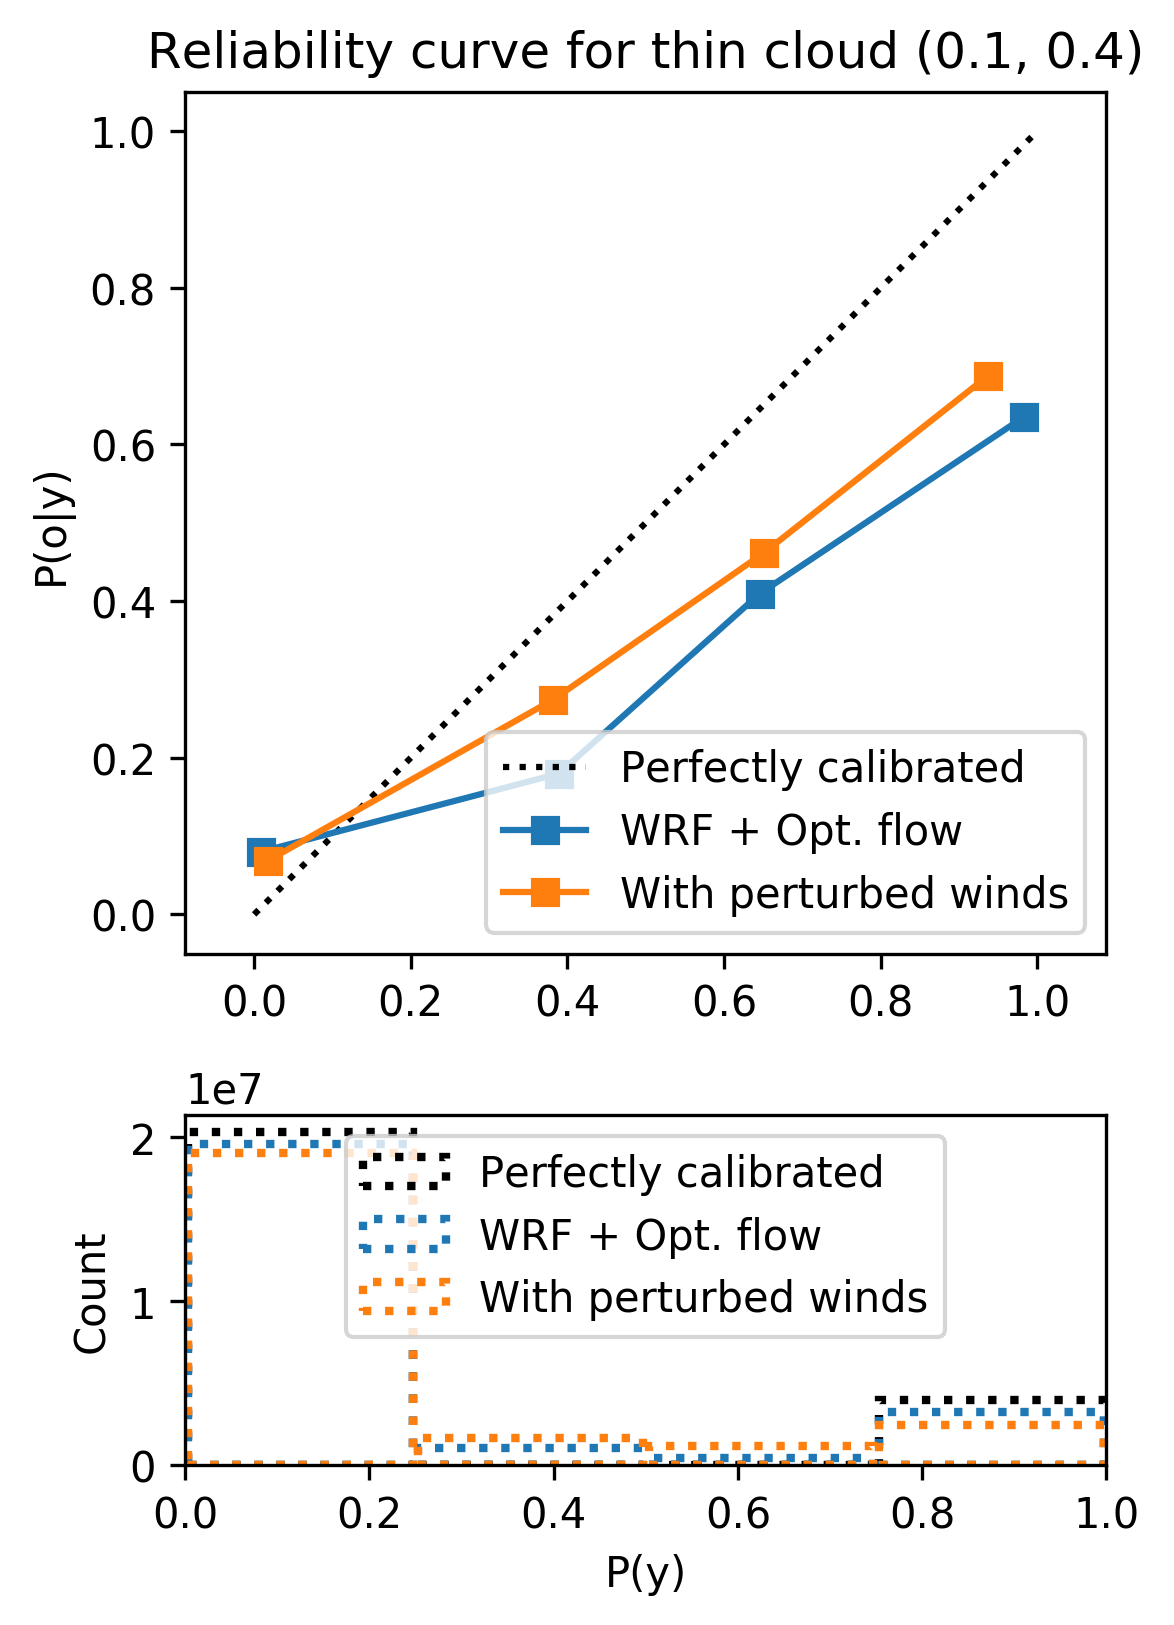

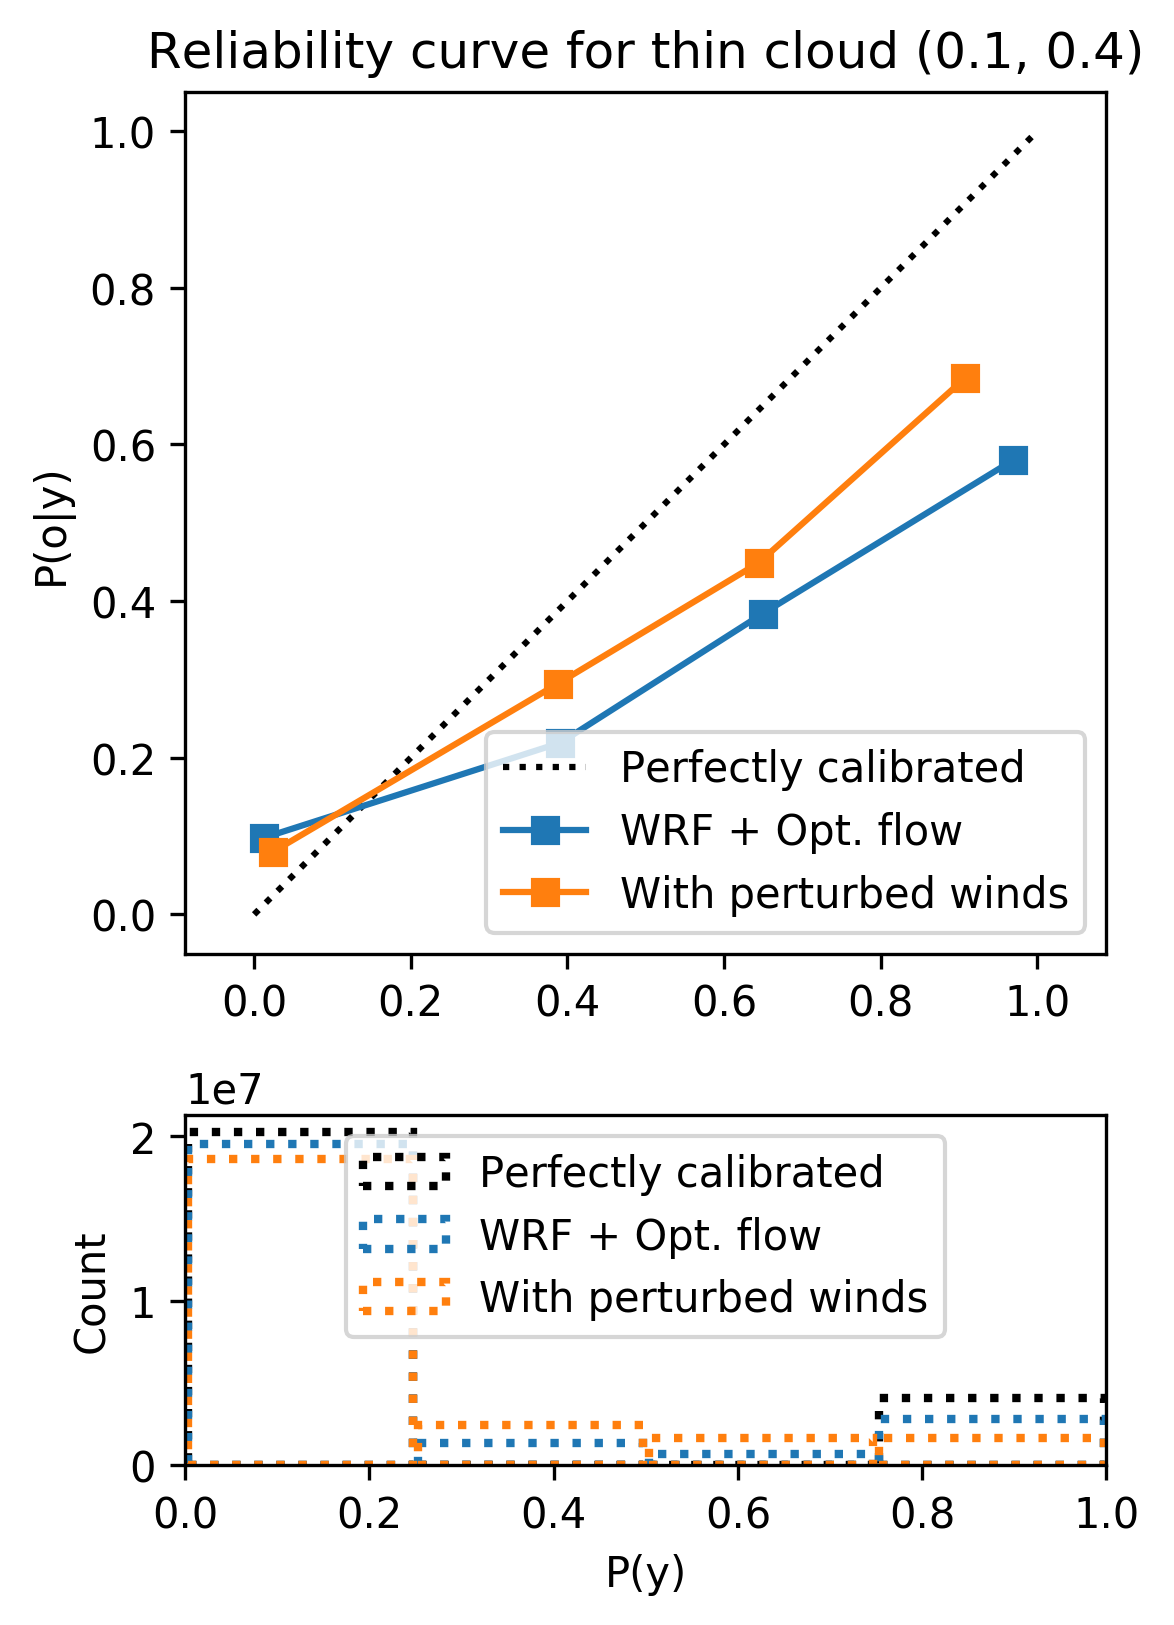

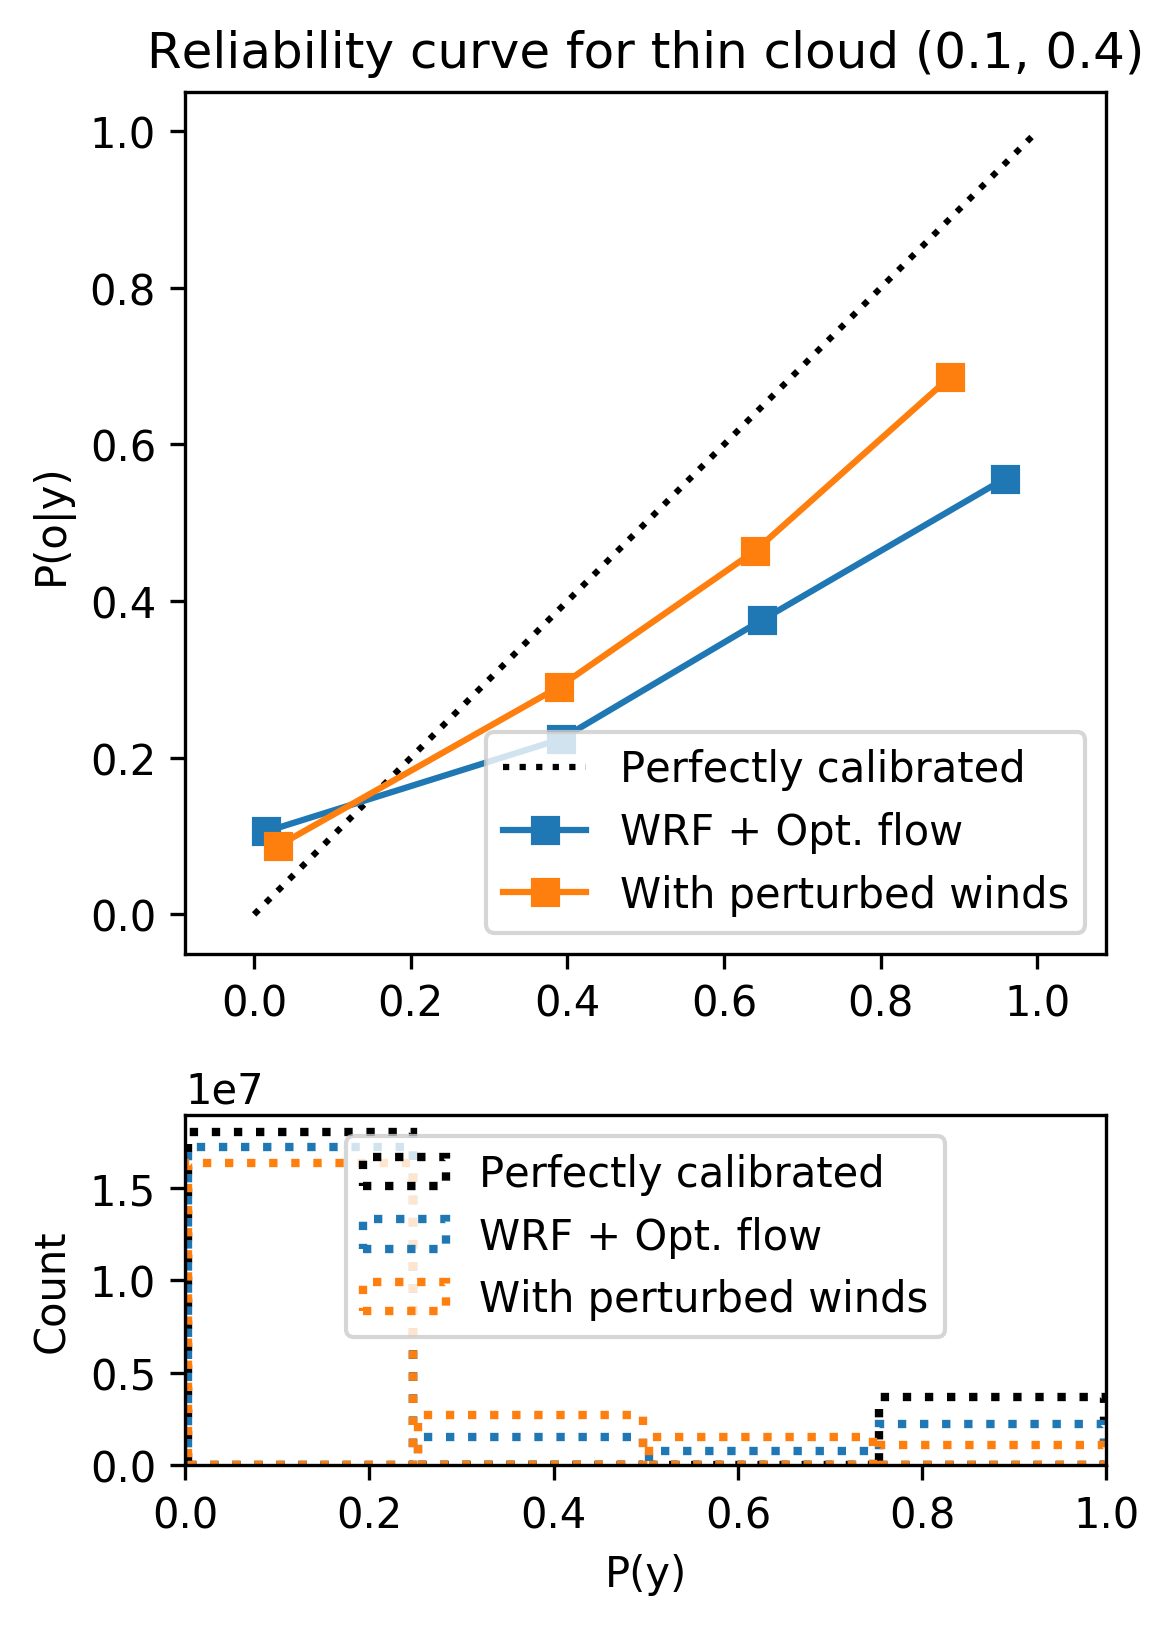

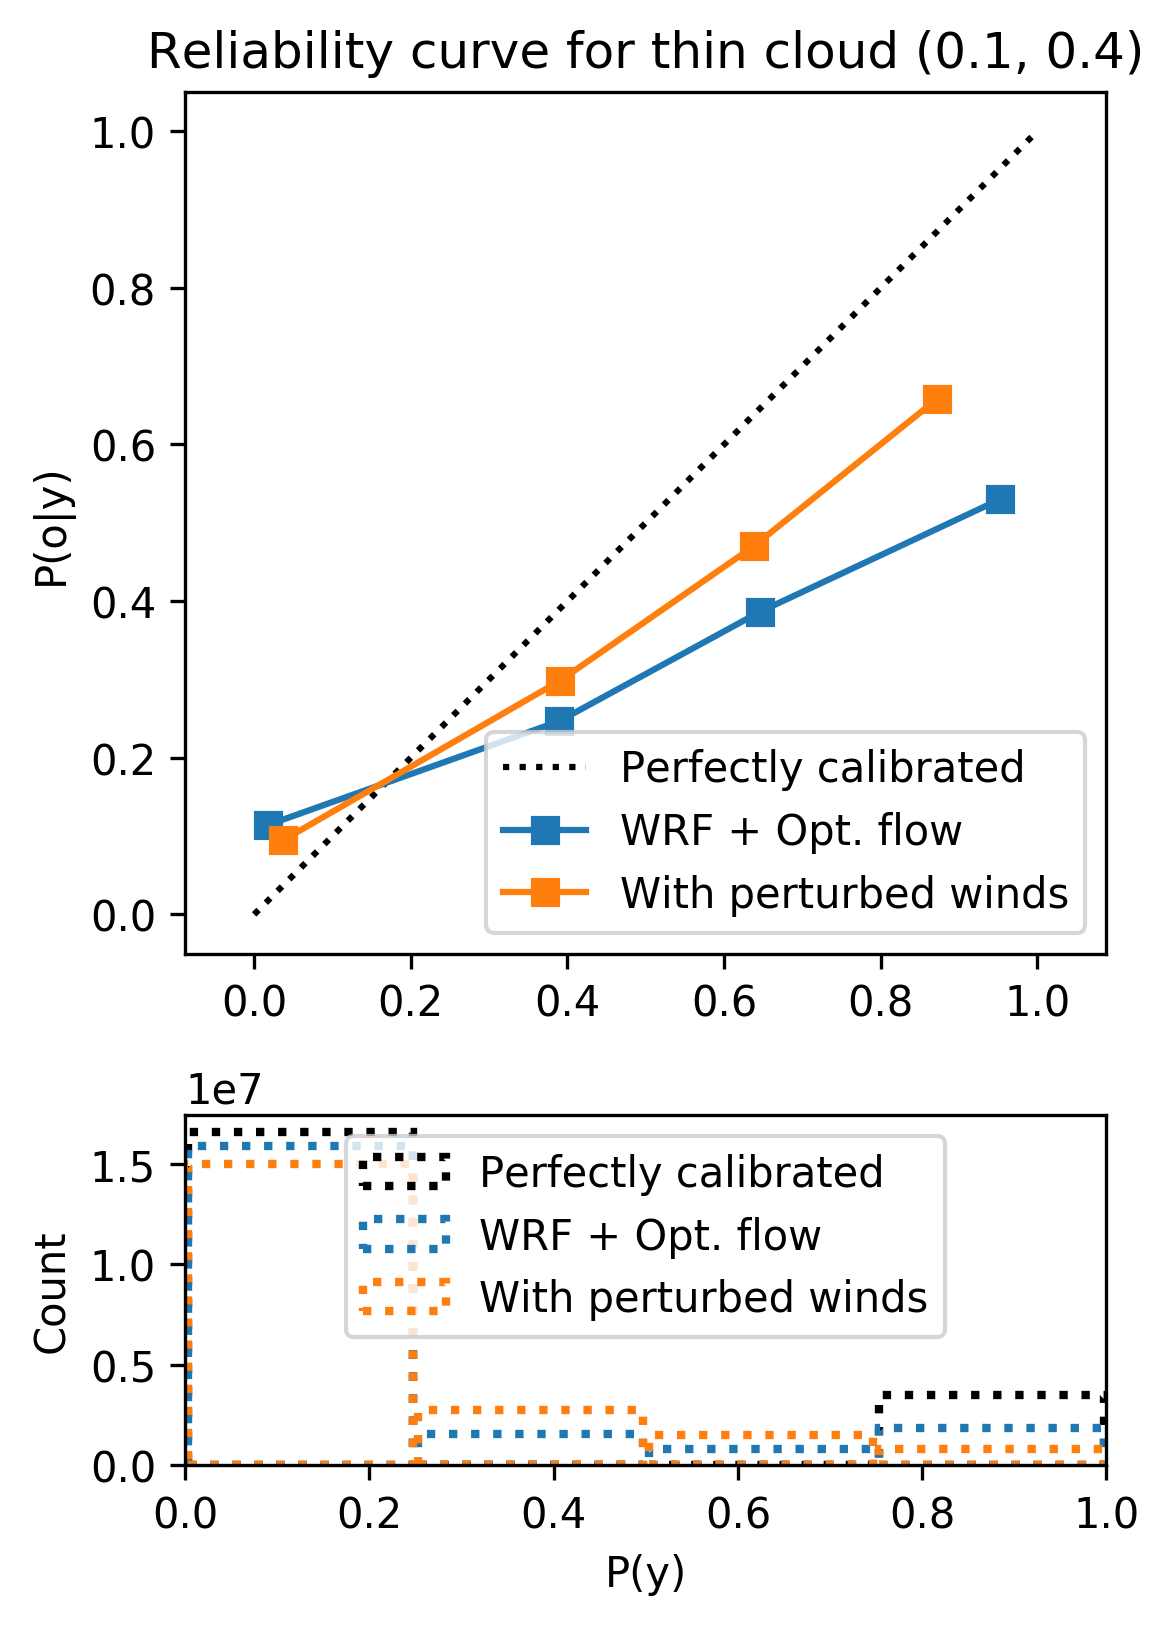

In [144]:
dpi = 300
for hor in [15, 30, 45, 60]:
    owp_mmp = owp_opt['thin_0p1_0p4/mean_predicted_prob'][hor].dropna()
    owp_fop = owp_opt['thin_0p1_0p4/fraction_of_positives'][hor].dropna()
    owp_th = owp_opt['thin_0p1_0p4/truth_hist'].loc[owp_mmp.index]
    owp_fh = owp_opt['thin_0p1_0p4/forecast_hist'][hor].dropna()
    
    owp_mmp = (owp_mmp * owp_fh).sum()/owp_fh.sum()
    owp_fop = (owp_fop * owp_fh).sum()/owp_fh.sum()
    owp_th = owp_th.sum()
    owp_fh = owp_fh.sum()
    
    ow15_mmp = ow_15['thin_0p1_0p4/mean_predicted_prob'][hor].dropna()
    ow15_fop = ow_15['thin_0p1_0p4/fraction_of_positives'][hor].dropna()
    ow15_th = ow_15['thin_0p1_0p4/truth_hist'].loc[ow15_mmp.index]
    ow15_fh = ow_15['thin_0p1_0p4/forecast_hist'][hor].dropna()
    
    ow15_mmp = (ow15_mmp * ow15_fh).sum()/ow15_fh.sum()
    ow15_fop = (ow15_fop * ow15_fh).sum()/ow15_fh.sum()
    ow15_th = ow15_th.sum()
    ow15_fh = ow15_fh.sum()
    
    num_of_bins = owp_fh.size
    figsize = plt.figaspect(1.38)
    fig = plt.figure(figsize=figsize, dpi=dpi)
    ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
    ax2 = plt.subplot2grid((3, 1), (2, 0))

    ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
#     ax2.hist(truth_thick.values.ravel(), color='k', linestyle=':', range=(0, 1),
#              bins=num_of_bins, label="Perfectly calibrated",
#              histtype="step", lw=2)
    xhist = (np.arange(num_of_bins) + 0.5)/num_of_bins
    ax2.bar(xhist, owp_th, align='center', color='', edgecolor='k', linestyle=':',
            label="Perfectly calibrated", lw=2, width = 1/(num_of_bins + 0.1))
    count = 0
    for afop, ammp, afh, name in [(ow15_fop, ow15_mmp, ow15_fh, 'WRF + Opt. flow'),
                                  (owp_fop, owp_mmp, owp_fh, 'With perturbed winds')]:#,
    #                        (persistence_dist_thin, 'persistence_dist')]:

#         fraction_of_positives, mean_predicted_value = \
#             calibration.calibration_curve(
#                 truth_thin.values.ravel(),
#                 forecast.values.ravel(), n_bins=num_of_bins)
        this_color = cpal[count]
        ax1.plot(ammp, afop, "s-", c=this_color,
                 label=f'{name}')
        ax1.axis('equal')
#         ax2.hist(forecast.values.ravel(), range=(0, 1), bins=num_of_bins, label=name,
#                  histtype="step", lw=2, linestyle='--')
        ax2.bar(xhist, afh, align='center', color='', edgecolor=this_color,
                linestyle=':',
                label=name, lw=2, width = 1/(num_of_bins + 0.1))
        count += 1


    ax1.set_ylabel("P(o|y)")
    ax1.set_ylim([-0.05, 1.05])
    ax1.legend(loc="lower right")
    ax1.set_title('Reliability curve for thin cloud (0.1, 0.4)')

    ax2.set_xlabel("P(y)")
    ax2.set_xlim([0, 1])
    ax2.set_ylabel("Count")
    ax2.legend(loc="upper center", ncol=1)

    plt.tight_layout()

In [145]:
importlib.reload(analyse_results)
# month_day = [[4, 9], [4, 15], [4, 18], [5, 6], [5, 9], [5, 29], [6, 11], [6, 12]]
# month_day = [[4, 9],  [4, 15], [4, 18],
#              [5, 6],  [5, 9],  [5, 29],
#              [6, 11], [6, 12],
#              [4, 2],  [4, 5],  [4, 19],
#              [5, 7],  [5, 8],  [5, 19],
#              [6, 3],  [6, 10], [6, 14],
#              [6, 15]]
month_day = [[4, 9],  [4, 15], [4, 18],
             [5, 6],  [5, 9],  [5, 29],
             [6, 11], [6, 12],
             [4, 2],  [4, 5],  [4, 19],
             [5, 7],  [5, 8],  [5, 19],
             [6, 3],  [6, 10], [6, 14],
             [6, 15],
             [4, 10], [4, 11], [4, 12],
             [4, 20], [4, 21], [4, 22],
             [4, 25], [4, 26], [5, 5],
             [5, 20], [5, 21], [5, 22],
             [5, 23], [5, 24], [5, 25],
             [5, 30], [6, 16], [6, 17],
             [6, 18], [6, 19], [6, 22]]
runs = ['owp_opt', 'ow_15']
stats = ['brier_score',
         'forecast_hist',
         'fraction_of_positives',
         'mean_predicted_prob',
         'truth_hist']
stat_directory = ['thick_0p4_1']
these_stats = []
for this_stat in stats:
    for adir in stat_directory:
        these_stats.append(os.path.join(adir, this_stat))
returned = analyse_results.read_prob_stats(
    month_day, runs, these_stats)

owp_opt
thick_0p4_1/brier_score
thick_0p4_1/forecast_hist
thick_0p4_1/fraction_of_positives
thick_0p4_1/mean_predicted_prob
thick_0p4_1/truth_hist
ow_15
thick_0p4_1/brier_score
thick_0p4_1/forecast_hist
thick_0p4_1/fraction_of_positives
thick_0p4_1/mean_predicted_prob
thick_0p4_1/truth_hist


In [149]:
for a_returned in returned:
    this_name = a_returned['name']
    exec(this_name + ' = a_returned')

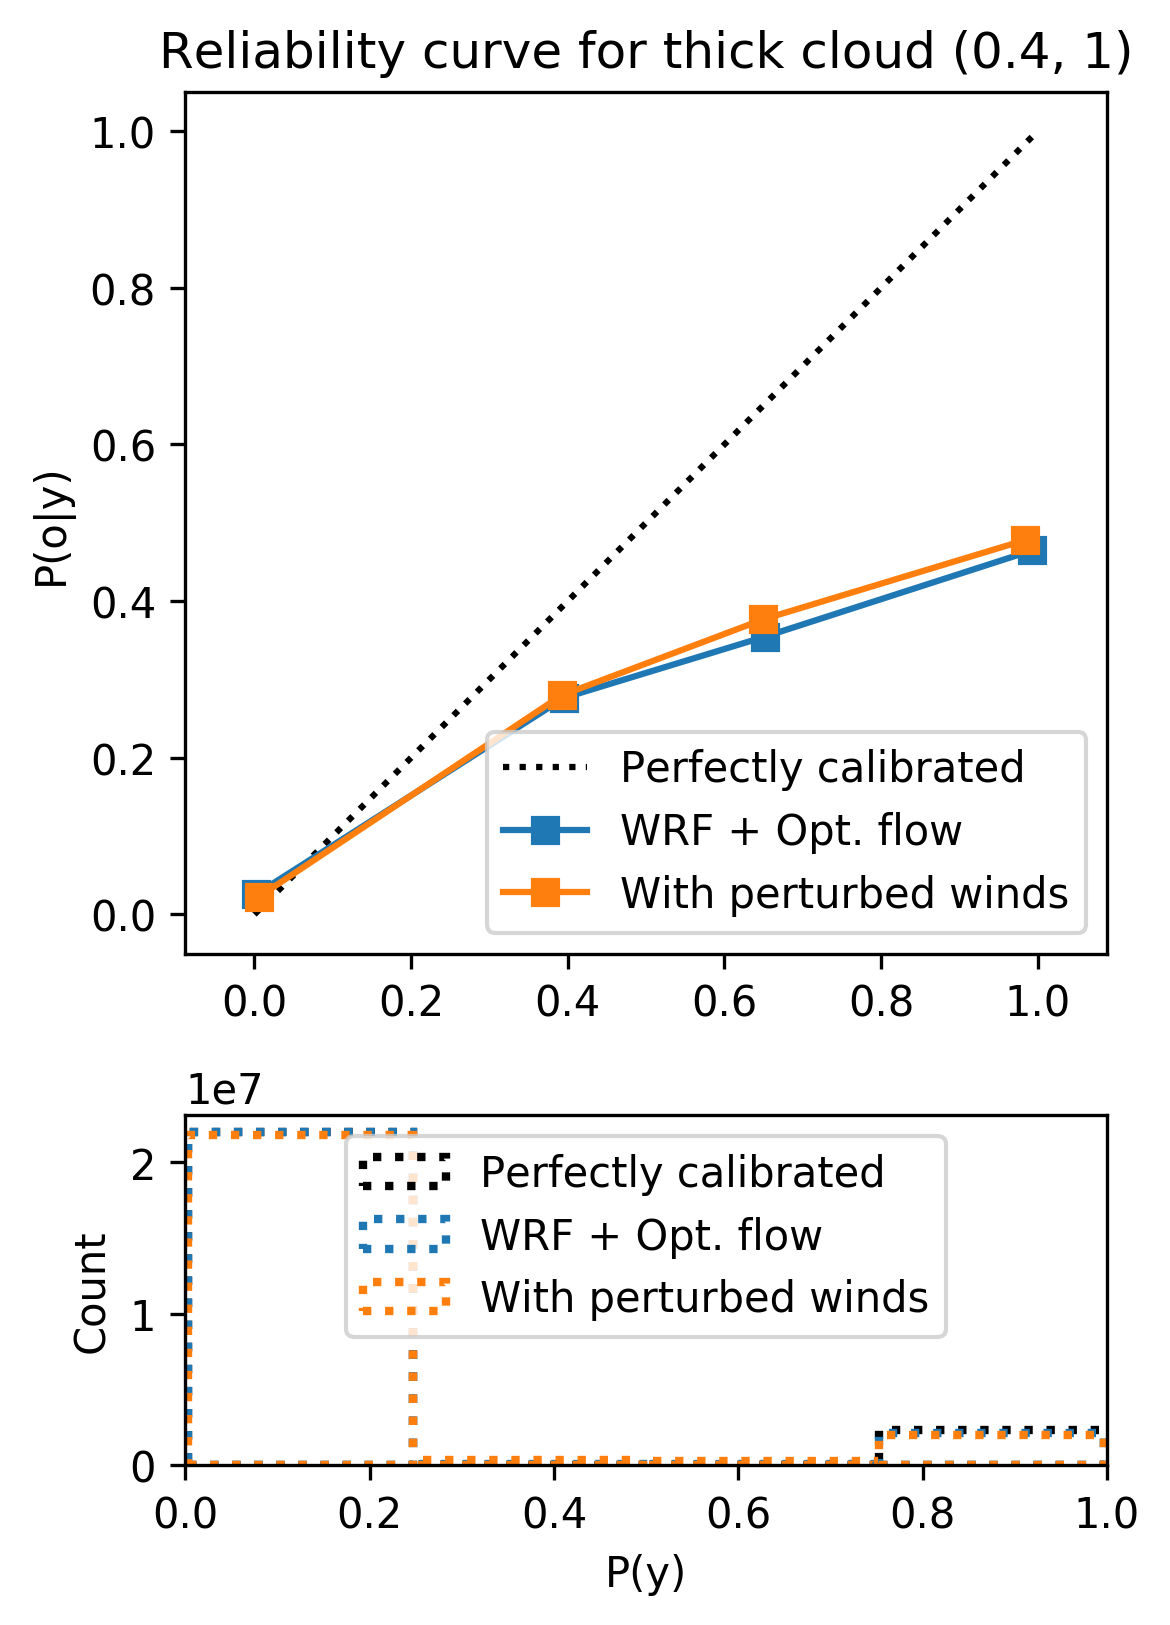

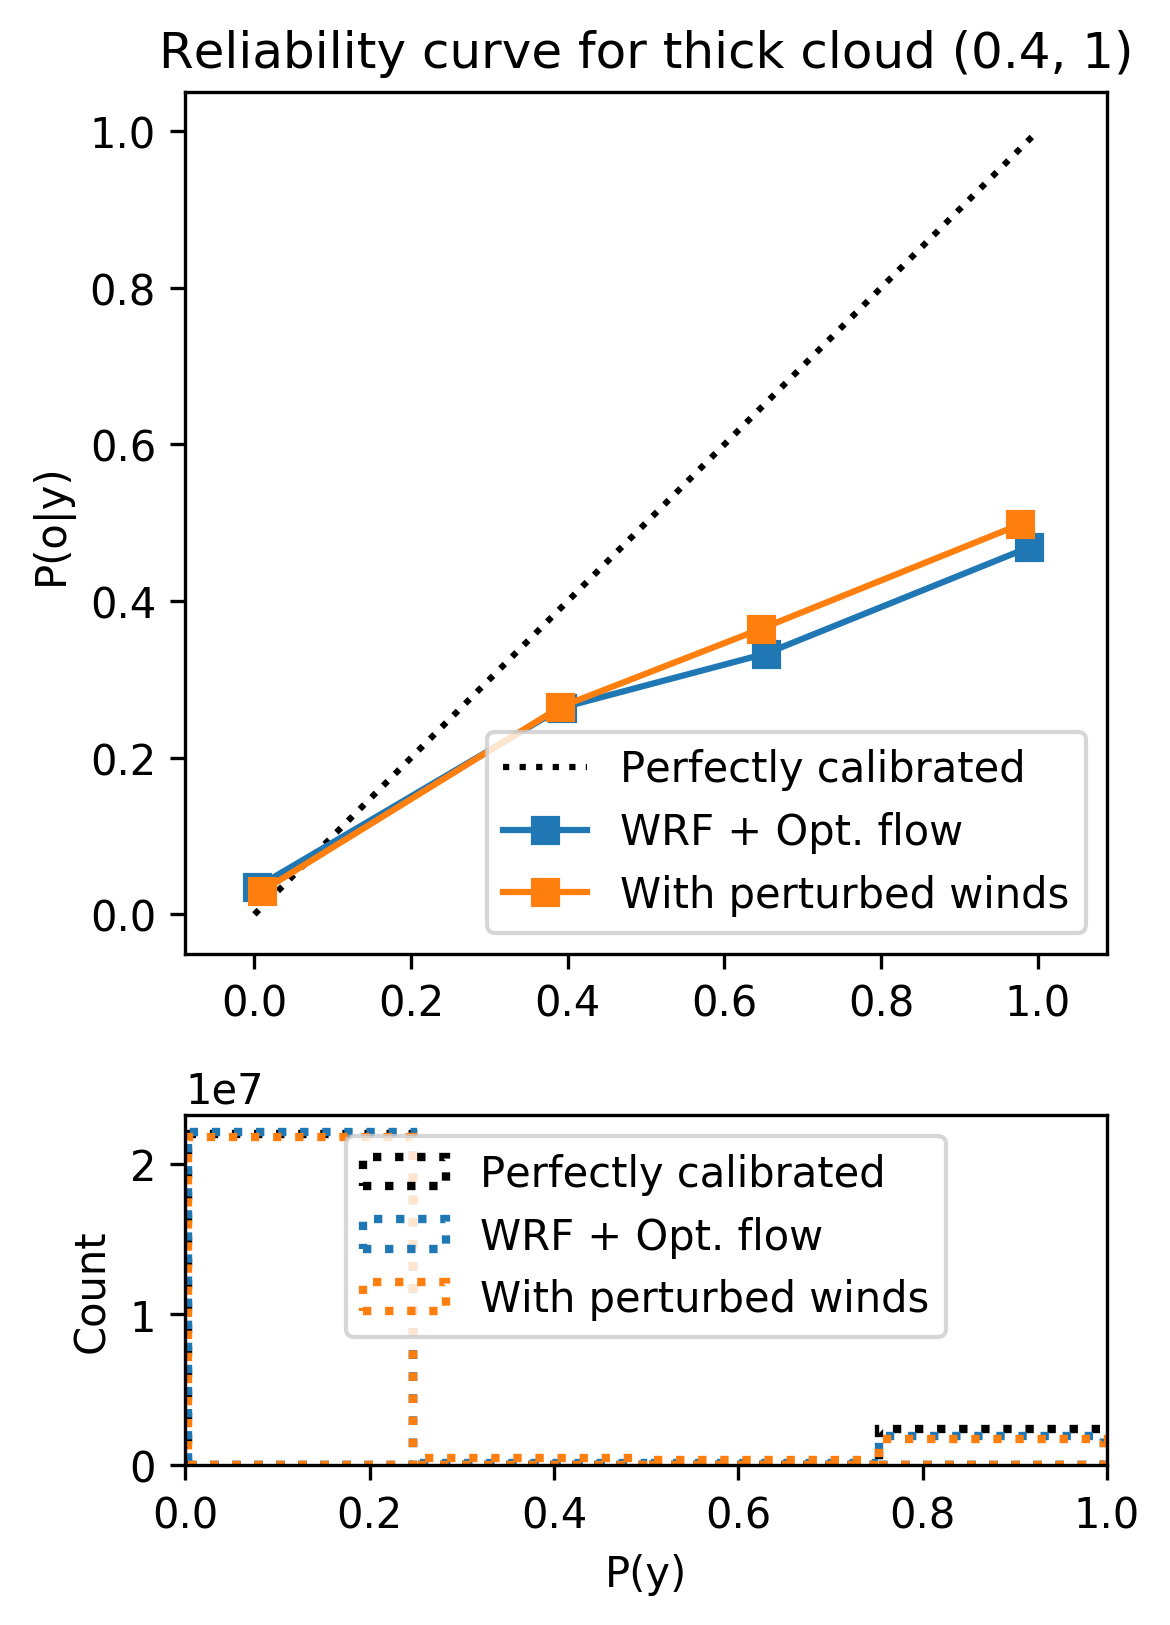

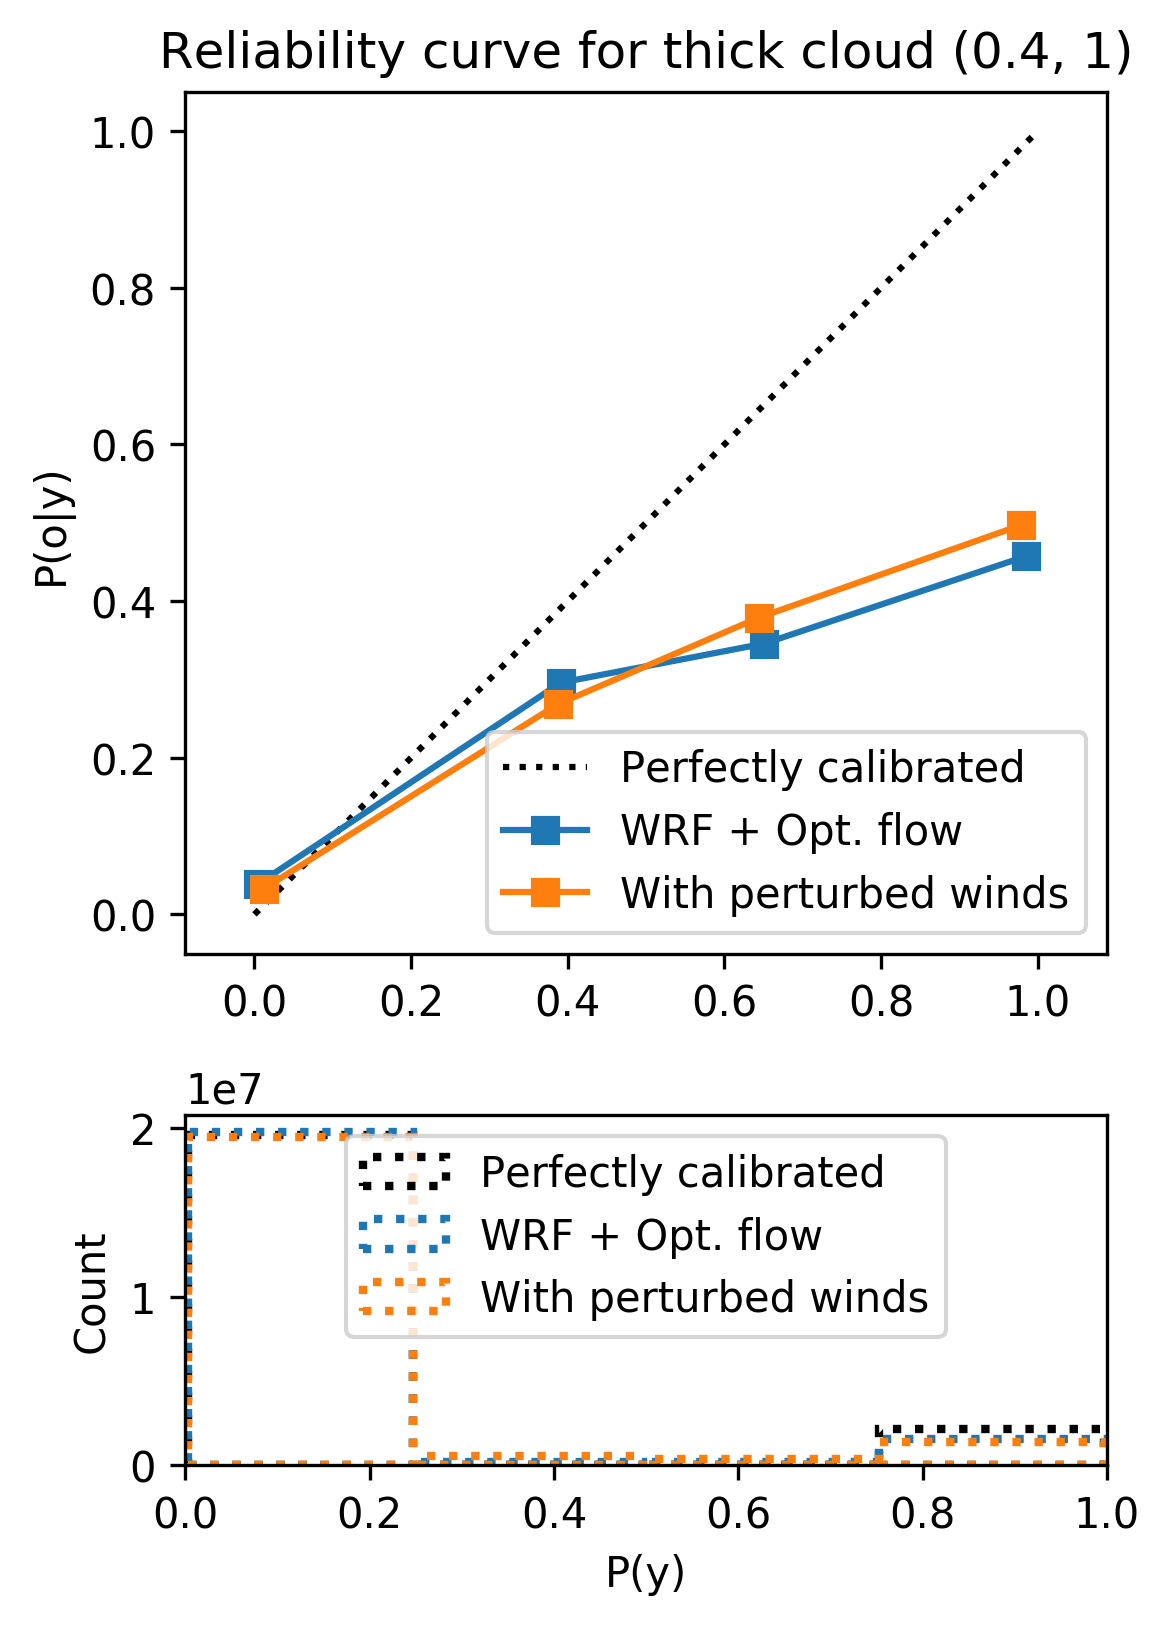

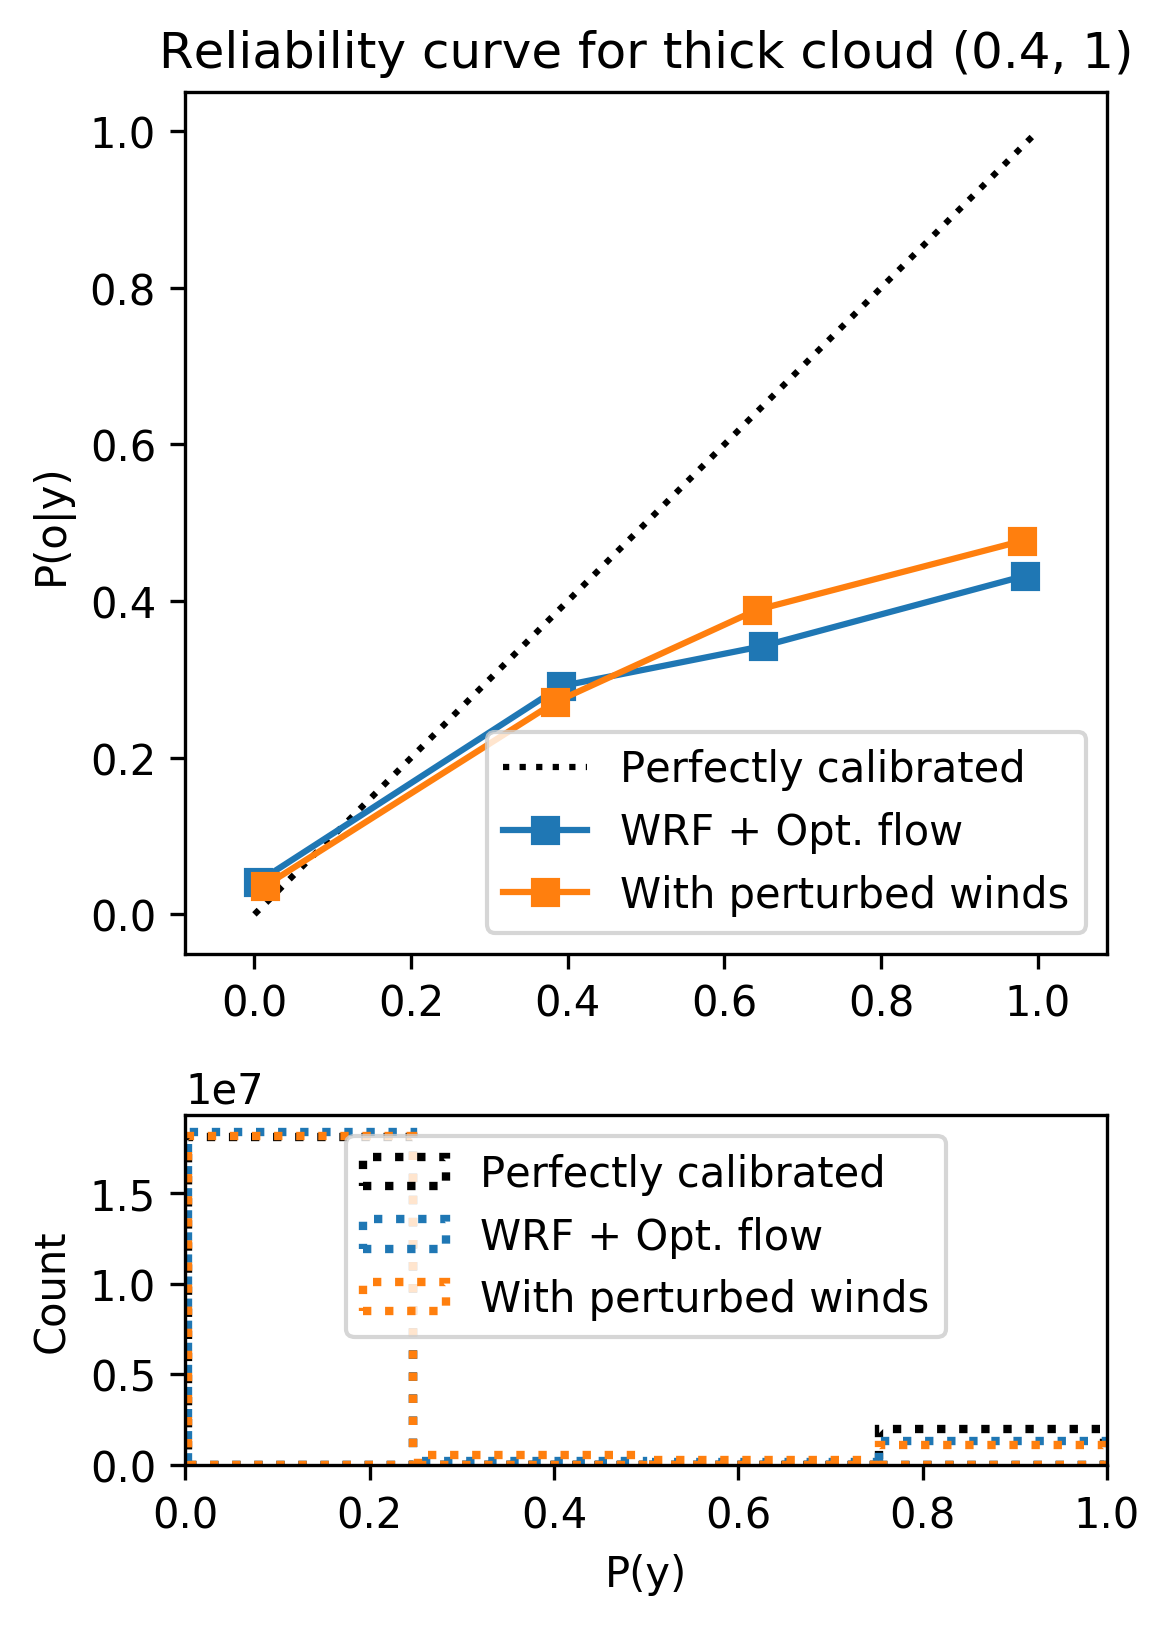

In [151]:
dpi = 300
for hor in [15, 30, 45, 60]:
    owp_mmp = owp_opt['thick_0p4_1/mean_predicted_prob'][hor].dropna()
    owp_fop = owp_opt['thick_0p4_1/fraction_of_positives'][hor].dropna()
    owp_th = owp_opt['thick_0p4_1/truth_hist'].loc[owp_mmp.index]
    owp_fh = owp_opt['thick_0p4_1/forecast_hist'][hor].dropna()
    
    owp_mmp = (owp_mmp * owp_fh).sum()/owp_fh.sum()
    owp_fop = (owp_fop * owp_fh).sum()/owp_fh.sum()
    owp_th = owp_th.sum()
    owp_fh = owp_fh.sum()
    
    ow15_mmp = ow_15['thick_0p4_1/mean_predicted_prob'][hor].dropna()
    ow15_fop = ow_15['thick_0p4_1/fraction_of_positives'][hor].dropna()
    ow15_th = ow_15['thick_0p4_1/truth_hist'].loc[ow15_mmp.index]
    ow15_fh = ow_15['thick_0p4_1/forecast_hist'][hor].dropna()
    
    ow15_mmp = (ow15_mmp * ow15_fh).sum()/ow15_fh.sum()
    ow15_fop = (ow15_fop * ow15_fh).sum()/ow15_fh.sum()
    ow15_th = ow15_th.sum()
    ow15_fh = ow15_fh.sum()
    
    num_of_bins = owp_fh.size
    figsize = plt.figaspect(1.38)
    fig = plt.figure(figsize=figsize, dpi=dpi)
    ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
    ax2 = plt.subplot2grid((3, 1), (2, 0))

    ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
#     ax2.hist(truth_thick.values.ravel(), color='k', linestyle=':', range=(0, 1),
#              bins=num_of_bins, label="Perfectly calibrated",
#              histtype="step", lw=2)
    xhist = (np.arange(num_of_bins) + 0.5)/num_of_bins
    ax2.bar(xhist, owp_th, align='center', color='', edgecolor='k', linestyle=':',
            label="Perfectly calibrated", lw=2, width = 1/(num_of_bins + 0.1))
    count = 0
    for afop, ammp, afh, name in [(ow15_fop, ow15_mmp, ow15_fh, 'WRF + Opt. flow'),
                                  (owp_fop, owp_mmp, owp_fh, 'With perturbed winds')]:#,
    #                        (persistence_dist_thin, 'persistence_dist')]:

#         fraction_of_positives, mean_predicted_value = \
#             calibration.calibration_curve(
#                 truth_thin.values.ravel(),
#                 forecast.values.ravel(), n_bins=num_of_bins)
        this_color = cpal[count]
        ax1.plot(ammp, afop, "s-", c=this_color,
                 label=f'{name}')
        ax1.axis('equal')
#         ax2.hist(forecast.values.ravel(), range=(0, 1), bins=num_of_bins, label=name,
#                  histtype="step", lw=2, linestyle='--')
        ax2.bar(xhist, afh, align='center', color='', edgecolor=this_color,
                linestyle=':',
                label=name, lw=2, width = 1/(num_of_bins + 0.1))
        count += 1


    ax1.set_ylabel("P(o|y)")
    ax1.set_ylim([-0.05, 1.05])
    ax1.legend(loc="lower right")
    ax1.set_title('Reliability curve for thick cloud (0.4, 1)')

    ax2.set_xlabel("P(y)")
    ax2.set_xlim([0, 1])
    ax2.set_ylabel("Count")
    ax2.legend(loc="upper center", ncol=1)

    plt.tight_layout()

 # Thick cloud

In [ ]:
truth = dates_truth

In [ ]:
error_times = dates_error_times

In [ ]:
ow_15_30 = dates_15

In [ ]:
ow_15_wp3_30 = dates_wp

In [ ]:
thin_ub = 0.4

In [ ]:
truth_thick = (truth.sel(time=error_times)>thin_ub).astype('float')

In [ ]:
persistence_thick = (persistence.sel(time=error_times)>thin_ub).astype('float')

In [ ]:
persistence_dist_thick = persistence_thick.copy()

In [ ]:
for ii in range(error_times.size):
    persistence_dist_thick[ii] = persistence_dist_thick[ii].mean(dim=['west_east', 'south_north']).item()

In [ ]:
ow_15_thick = (ow_15_30.sel(time=error_times)>thin_ub).astype('int')
ow_15_thick = ow_15_thick.mean(dim='ensemble_number')

In [ ]:
ow_15_wp3_thick = (ow_15_wp3_30.sel(time=error_times)>thin_ub).astype('int')
ow_15_wp3_thick = ow_15_wp3_thick.mean(dim='ensemble_number')

In [ ]:
this = ps.brier_score(truth_thick.values.ravel(), ow_15_wp3_thick.values.ravel()).mean()
print('wp3: ', this)

In [ ]:
this = ps.brier_score(truth_thick.values.ravel(), ow_15_thick.values.ravel()).mean()
print('ow_15: ', this)

In [ ]:
this = ps.brier_score(truth_thick.values.ravel(), persistence_dist_thick.values.ravel()).mean()
print(this)

In [ ]:
this = ps.brier_score(truth_thick.values.ravel(), persistence_thick.values.ravel()).mean()
print(this)

In [ ]:
%matplotlib inline

In [ ]:
num_of_bins = 10
figsize = plt.figaspect(1.38)
fig = plt.figure(figsize=figsize, dpi=dpi)
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
ax2.hist(truth_thick.values.ravel(), color='k', linestyle=':',
         range=(0, 1), bins=num_of_bins, label="Perfectly calibrated",
         histtype="step", lw=2)
for forecast, name in [(ow_15_thick, 'WRF + Opt. flow'),
                       (ow_15_wp3_thick, 'With perturbed winds')]:#,
#                        (persistence_dist_thick, 'persistence_dist')]:
    
    fraction_of_positives, mean_predicted_value = \
        calibration.calibration_curve(
            truth_thick.values.ravel(),
            forecast.values.ravel(), n_bins=num_of_bins)

    ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
             label=f'{name}')
    ax2.hist(forecast.values.ravel(), range=(0, 1), bins=num_of_bins, label=name,
             histtype="step", lw=2, linestyle='--')


ax1.set_ylabel("P(o|y)")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Reliability curve for thick cloud forecast')

ax2.set_xlabel("P(y)")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=1)

plt.tight_layout()

# Clear

In [ ]:
clear_ub = 0.1

In [ ]:
truth_clear = (truth.sel(time=error_times)<clear_ub).astype('float')

In [ ]:
persistence_clear = (persistence.sel(time=error_times)<clear_ub).astype('float')

In [ ]:
persistence_dist_clear = persistence_clear.copy()

In [ ]:
for ii in range(error_times.size):
    persistence_dist_clear[ii] = persistence_dist_clear[ii].mean(dim=['west_east', 'south_north']).item()

In [ ]:
ow_15_clear = (ow_15_30.sel(time=error_times)<clear_ub).astype('int')
ow_15_clear = ow_15_clear.mean(dim='ensemble_number')

In [ ]:
ow_15_wp3_clear = (ow_15_wp3_30.sel(time=error_times)<clear_ub).astype('int')
ow_15_wp3_clear = ow_15_wp3_clear.mean(dim='ensemble_number')

In [ ]:
this = ps.brier_score(truth_clear.values.ravel(), ow_15_wp3_clear.values.ravel()).mean()
print(this)

In [ ]:
this = ps.brier_score(truth_clear.values.ravel(), ow_15_clear.values.ravel()).mean()
print(this)

In [ ]:
this = ps.brier_score(truth_clear.values.ravel(), persistence_dist_clear.values.ravel()).mean()
print(this)

In [ ]:
this = ps.brier_score(truth_clear.values.ravel(), persistence_clear.values.ravel()).mean()
print(this)

In [ ]:
fraction_of_positives, mean_predicted_value = \
        calibration.calibration_curve(
            truth_clear.values.ravel(),
            ow_15_wp3_clear.values.ravel(), n_bins=num_of_bins)

In [ ]:
mean_predicted_value

In [ ]:
# (ow_15_thick, 'WRF + Opt. flow'),
#                        (ow_15_wp3_thick, 'W / perturbed winds')

In [ ]:
%matplotlib inline

In [ ]:
num_of_bins = 10
figsize = plt.figaspect(1.38)
fig = plt.figure(figsize=figsize, dpi=dpi)
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
ax2.hist(truth_clear.values.ravel(), color='k', linestyle=':', range=(0, 1), bins=num_of_bins, label="Perfectly calibrated",
         histtype="step", lw=2)
for forecast, name in [(ow_15_clear, 'WRF + Opt. flow'),
                       (ow_15_wp3_clear, 'With perturbed winds')]:#,
#                        (persistence_dist_clear, 'persistence_dist')]:
    
    fraction_of_positives, mean_predicted_value = \
        calibration.calibration_curve(
            truth_clear.values.ravel(),
            forecast.values.ravel(), n_bins=num_of_bins)

    ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
             label=f'{name}')
    ax2.hist(forecast.values.ravel(), range=(0, 1), bins=num_of_bins, label=name,
             histtype="step", lw=2, linestyle='--')


ax1.set_ylabel("P(o|y)")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Reliability curve for clearsky forecast')

ax2.set_xlabel("P(y)")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=1)

plt.tight_layout()

# Thin cloud

In [ ]:
truth_thin = np.logical_and(truth.sel(time=error_times)<thin_ub,
                            truth.sel(time=error_times)>clear_ub).astype('float')

In [ ]:
persistence_thin = np.logical_and(persistence.sel(time=error_times)<thin_ub,
                                  persistence.sel(time=error_times)>clear_ub).astype('float')

In [ ]:
persistence_dist_thin = persistence_thin.copy()

In [ ]:
for ii in range(error_times.size):
    persistence_dist_thin[ii] = persistence_dist_thin[ii].mean(dim=['west_east', 'south_north']).item()

In [ ]:
ow_15_thin = np.logical_and(ow_15_30.sel(time=error_times)<thin_ub,
                            ow_15_30.sel(time=error_times)>clear_ub).astype('int')
ow_15_thin = ow_15_thin.mean(dim='ensemble_number')

In [ ]:
ow_15_wp3_thin = np.logical_and(ow_15_wp3_30.sel(time=error_times)<thin_ub,
                                ow_15_wp3_30.sel(time=error_times)>clear_ub).astype('int')
ow_15_wp3_thin = ow_15_wp3_thin.mean(dim='ensemble_number')

In [ ]:
this = ps.brier_score(truth_thin.values.ravel(), ow_15_wp3_thin.values.ravel()).mean()
print('wp3: ', this)

In [ ]:
this = ps.brier_score(truth_thin.values.ravel(), ow_15_thin.values.ravel()).mean()
print('ow_15: ', this)

In [ ]:
this = ps.brier_score(truth_thin.values.ravel(), persistence_dist_thin.values.ravel()).mean()
print(this)

In [ ]:
this = ps.brier_score(truth_thin.values.ravel(), persistence_thin.values.ravel()).mean()
print(this)

In [ ]:
%matplotlib inline

In [ ]:
plt.close('all')

In [ ]:
# (ow_15_thick, 'WRF + Opt. flow'),
#                        (ow_15_wp3_thick, 'W / perturbed winds')

In [ ]:
num_of_bins = 10
figsize = plt.figaspect(1.38)
fig = plt.figure(figsize=figsize, dpi=dpi)
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
ax2.hist(truth_thick.values.ravel(), color='k', linestyle=':', range=(0, 1), bins=num_of_bins, label="Perfectly calibrated",
         histtype="step", lw=2)
for forecast, name in [(ow_15_thin, 'WRF + Opt. flow'),
                       (ow_15_wp3_thin, 'With perturbed winds')]:#,
#                        (persistence_dist_thin, 'persistence_dist')]:
    
    fraction_of_positives, mean_predicted_value = \
        calibration.calibration_curve(
            truth_thin.values.ravel(),
            forecast.values.ravel(), n_bins=num_of_bins)

    ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
             label=f'{name}')
    ax1.axis('equal')
    ax2.hist(forecast.values.ravel(), range=(0, 1), bins=num_of_bins, label=name,
             histtype="step", lw=2, linestyle='--')


ax1.set_ylabel("P(o|y)")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Reliability curve for thin cloud forecast')

ax2.set_xlabel("P(y)")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=1)

plt.tight_layout()

In [ ]:
plt.close('all')